In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

In [2]:
df_iron = pd.read_csv('../Cruise_2024/Data/EXPS/Iron.csv', sep=',', index_col=0)
df_ironT = pd.read_csv('../Cruise_2024/Data/EXPS/Iron_T.csv', sep=',', index_col=0)
df_abs = pd.read_csv('../Cruise_2024/Data/EXPS/ABS.csv', sep=',', index_col=0)
df_time = pd.read_csv('../Cruise_2024/Data/EXPS/Time.csv', sep=',')
df_doc = pd.read_csv('../Cruise_2024/Data/EXPS/DOC_edit.csv', sep=',', index_col=0)

def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))  # Split the time and convert to integers
    return hours * 60 + minutes

# Apply the function to the 'MilitaryTime' column
df_time['time'] = df_time['Time'].apply(time_to_minutes)

df_ironT_join = df_ironT.groupby(df_ironT.index)['FeT_nm'].mean()
df_iron['FeT_nm'] = df_ironT_join
df_iron['Fe3_nm'] = df_iron['FeT_nm'] - df_iron['Fe2_nm']


df_abs_exps = df_abs[df_abs['Type'] == 'EXPS']
df_iron_exps = df_iron[df_iron['Type'] == 'EXPS']
df_iron_exps = pd.read_csv('../Cruise_2024/Data/EXPS/Iron_edit.csv', sep=',', index_col=0)
df_doc_exps = df_doc[df_doc['Type'] == 'EXPS']


df_all = df_abs_exps.merge(
    df_time[['EXPS_GROUP', 'Time_group', 'Time', 'time', 'O2']],
    on=['EXPS_GROUP', 'Time_group'],
    how='outer'
)


df_all = df_all.merge(
    df_iron_exps[['Type', 'Treat', 'EXPS_GROUP', 'Time_group', 'Fe2_nm','FeT_nm', 'Fe3_nm']],
    on=['EXPS_GROUP', 'Time_group', 'Treat', 'Type'],
    how='outer'
)

df_all = df_all.merge(
    df_doc_exps[['Type', 'Time_group', 'Treat', 'EXPS_GROUP', 'NPOC_uM', 'TN_uM']],
    on=['EXPS_GROUP', 'Time_group', 'Treat', 'Type'],
    how='outer'
)

df_all['Fe3_%'] = df_all['Fe3_nm'] / df_all['FeT_nm'] * 100
df_all['SUVA'] = df_all['acdom_254_bc'] / df_all['NPOC_uM'] * 0.012
df_all['SUVA_350'] = df_all['acdom_350_bc'] / df_all['NPOC_uM'] 


df_all['SUVA'].max()

0.0014528245039391735

In [3]:
df_iron = pd.read_csv('../Cruise_2024/Data/EXPS/Iron.csv', sep=',', index_col=0)
df_ironT = pd.read_csv('../Cruise_2024/Data/EXPS/Iron_T.csv', sep=',', index_col=0)
df_abs = pd.read_csv('../Cruise_2024/Data/EXPS/ABS.csv', sep=',', index_col=0)
df_time = pd.read_csv('../Cruise_2024/Data/EXPS/Time.csv', sep=',')
df_doc = pd.read_csv('../Cruise_2024/Data/EXPS/DOC_edit.csv', sep=',', index_col=0)

def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))  # Split the time and convert to integers
    return hours * 60 + minutes

# Apply the function to the 'MilitaryTime' column
df_time['time'] = df_time['Time'].apply(time_to_minutes)


df_abs_exps = df_abs[df_abs['Type'] == 'EXPS']
df_iron_exps = df_iron[df_iron['Type'] == 'EXPS']
df_iron_exps = pd.read_csv('../Cruise_2024/Data/EXPS/Iron_edit.csv', sep=',', index_col=0)
df_doc_exps = df_doc[df_doc['Type'] == 'EXPS']

df_abs_exps = df_abs_exps.merge(
    df_time[['EXPS_GROUP', 'Time_group', 'Time', 'time', 'O2']],
    on=['EXPS_GROUP', 'Time_group'],
    how='left'
)

df_iron_exps = df_iron_exps.merge(
    df_time[['EXPS_GROUP', 'Time_group', 'Time', 'time', 'O2']],
    on=['EXPS_GROUP', 'Time_group'],
    how='left'
)

df_doc_exps = df_doc_exps.merge(
    df_time[['EXPS_GROUP', 'Time_group', 'Time', 'time', 'O2']],
    on=['EXPS_GROUP', 'Time_group'],
    how='left'
)



df_abs_inital = df_abs[df_abs['Type'] != 'EXPS']
df_iron_inital = df_iron[df_iron['Type'] != 'EXPS']

df_inital = df_iron_inital.merge(
    df_abs_inital[['Type', 'Treat', 'EXPS_GROUP', 'acdom_254_bc',
                   'acdom_320_bc', 'acdom_350_bc', 'acdom_412_bc', 'acdom_440_bc',
                   'acdom_700_bc', 'ss_275_700_sem', 'ss_275_295_sem', 'ss_350_400_sem']],
    on=['Type', 'Treat', 'EXPS_GROUP'],
    how='left'
)


df_abs_exps = df_abs_exps.drop(160)
df_abs_exps = df_abs_exps.drop(4)

df_iron_exps = pd.read_csv('../Cruise_2024/Data/EXPS/Iron_edit.csv', sep=',', index_col=0)

df_abs_exps

Type Treat EXPS_GROUP Time_group  acdom_254_bc  acdom_320_bc  \
0    EXPS  P02F       CL11         T1      2.064346      0.387264   
1    EXPS   P2F       CL11         T1      1.853539      0.379534   
2    EXPS  P02F       CL11         T2      1.493064      0.364795   
3    EXPS  P02F       CL11         T2      1.495296      0.351935   
5    EXPS  P02F       CL11         T2      1.666420      0.496066   
..    ...   ...        ...        ...           ...           ...   
173  EXPS  P02F         PB         T5      2.585298      0.644109   
174  EXPS   P2F         PB         T5      2.972016      0.954120   
175  EXPS   P2F         PB         T5      2.967783      0.950621   
176  EXPS  P02F         PB         T6      2.485269      0.662532   
177  EXPS   P2F         PB         T6      2.840138      0.902837   

     acdom_350_bc  acdom_412_bc  acdom_440_bc  acdom_700_bc  ss_275_700_sem  \
0        0.212771      0.033355      0.002477     -0.056503        0.023471   
1        0.229835      0.074617      0.046473     -0.020547        0.023463   
2        0.274939      0.052255      0.023645     -0.028741        0.017432   
3        0.258807      0.038422      0.007543     -0.050976        0.017240   
5        0.393313      0.162928      0.134469      0.059961        0.016869   
..            ...           ...           ...           ...             ...   
173      0.400718      0.182200      0.111883     -0.017725        0.021317   
174      0.627754      0.293444      0.194037     -0.009065        0.017343   
175      0.624992      0.292954      0.194556     -0.007075        0.017354   
176      0.422828      0.204686      0.134956      0.008963        0.020477   
177      0.587679      0.270560      0.177148      0.007510        0.017804   

     ss_275_295_sem  ss_350_400_sem   Time  time   O2  
0          0.000013        0.021736  16:06   966  3.4  
1          0.000761        0.020109  16:06   966  3.4  
2          0.023334        0.022143  16:30   990  2.0  
3          0.024121        0.022164  16:30   990  2.0  
5          0.023795        0.022517  16:30   990  2.0  
..              ...             ...    ...   ...  ...  
173        0.013521        0.010582  16:35   995  1.4  
174        0.005638       -0.000003  16:35   995  1.4  
175        0.005866        0.011413  16:35   995  1.4  
176        0.010499        0.010023  17:21  1041  1.4  
177        0.000056        0.010778  17:21  1041  1.4  

[176 rows x 16 columns]

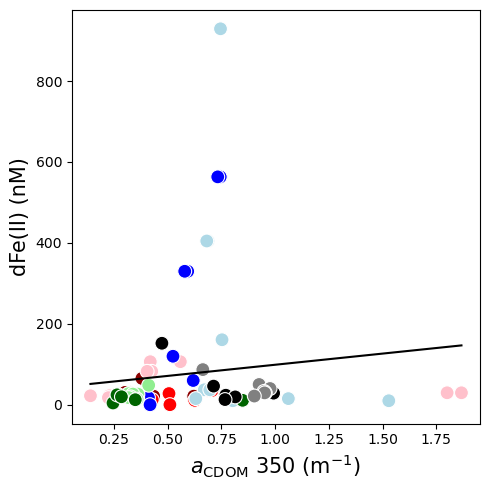

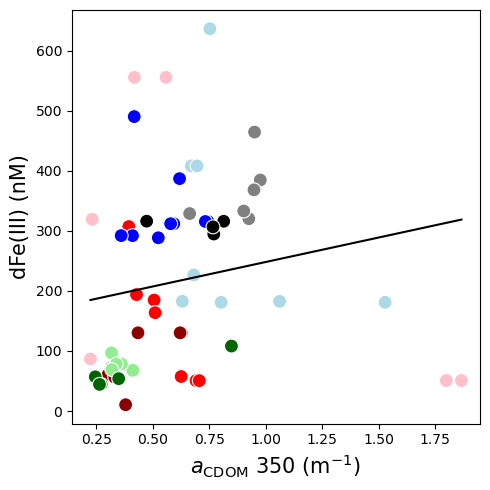

In [4]:
# Define custom colors
color_map = {
    'CL11': 'darkred',
    'CL13': 'red',
    'CL5': 'pink',
    'D': 'blue',
    'I': 'lightblue',
    'E': 'lightgreen',
    'N': 'darkgreen',
    'PA': 'black',
    'PB': 'grey',
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}


def plot_xyz(x,y,z,ds):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

    model = LinearRegression()
    sub = ds.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    subcat = data[z_var].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    axes.set_xlabel(x_lab, size=15)
    axes.set_ylabel(y_lab, size=15)
    
    plt.tight_layout()
    plt.show()

x_var = 'acdom_320_bc'
y_var = 'Fe2_nm'
z_var = 'EXPS_GROUP'
x_lab = r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'
y_lab = r'dFe(II) (nM)'
ds = df_all[df_all['Treat'] == 'P2F']

plot_xyz(x_var,y_var,z_var,ds)

x_var = 'acdom_320_bc'
y_var = 'Fe3_nm'
z_var = 'EXPS_GROUP'
x_lab = r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'
y_lab = r'dFe(III) (nM)'
ds = df_all[df_all['Treat'] == 'P2F']

plot_xyz(x_var,y_var,z_var,ds)



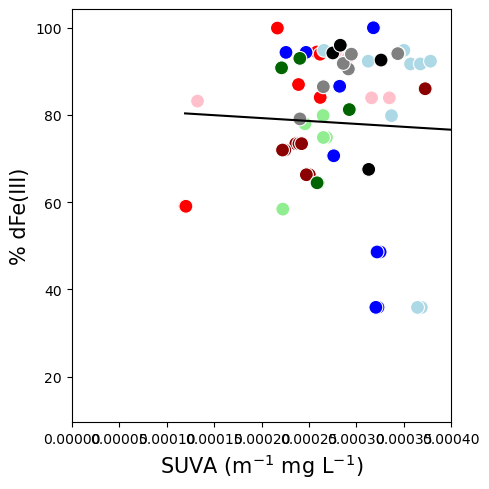

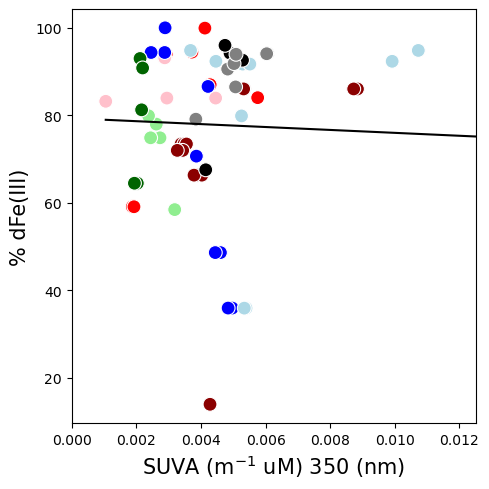

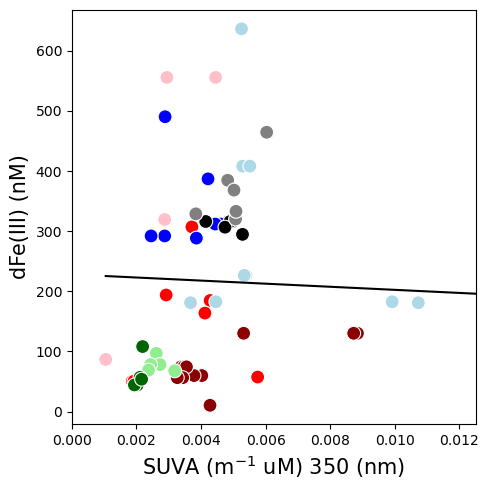

In [5]:
def plot_xyz(x,y,z,ds):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

    model = LinearRegression()
    sub = ds.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var]]
    subcat = data[z_var].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)

    sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
    sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')
    axes.set_xlabel(x_lab, size=15)
    axes.set_ylabel(y_lab, size=15)
    axes.set_xlim(0,x_max)
    
    plt.tight_layout()
    plt.show()

x_var = 'SUVA'
y_var = 'Fe3_%'
z_var = 'EXPS_GROUP'
x_lab = r'SUVA (m$^{-1}$ mg L$^{-1}$)'
y_lab = r'% dFe(III)'
x_max = 0.0004
ds = df_all[df_all['Treat'] == 'P2F']

plot_xyz(x_var,y_var,z_var,ds)


x_var = 'SUVA_350'
y_var = 'Fe3_%'
z_var = 'EXPS_GROUP'
x_lab = r'SUVA (m$^{-1}$ uM) 350 (nm)'
y_lab = r'% dFe(III)'
x_max = .0125
ds = df_all[df_all['Treat'] == 'P2F']

plot_xyz(x_var,y_var,z_var,ds)


x_var = 'SUVA_350'
y_var = 'Fe3_nm'
z_var = 'EXPS_GROUP'
x_lab = r'SUVA (m$^{-1}$ uM) 350 (nm)'
y_lab = r'dFe(III) (nM)'
x_max = .0125
ds = df_all[df_all['Treat'] == 'P2F']

plot_xyz(x_var,y_var,z_var,ds)

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

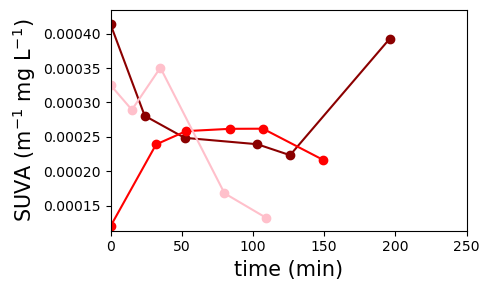

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

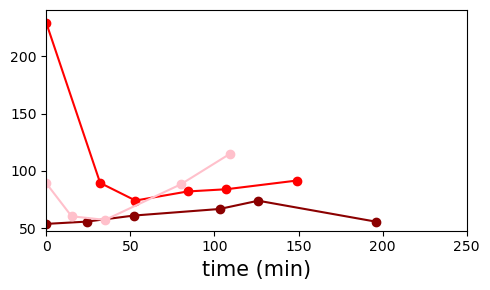

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

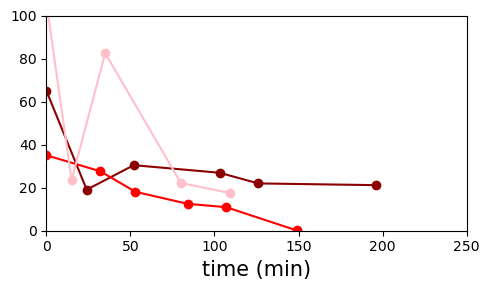

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


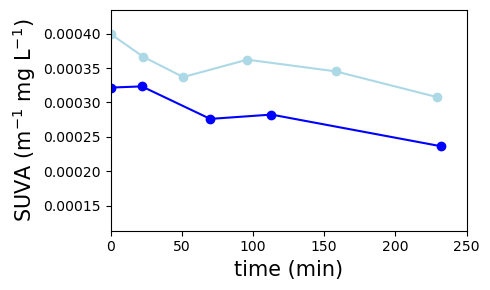

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


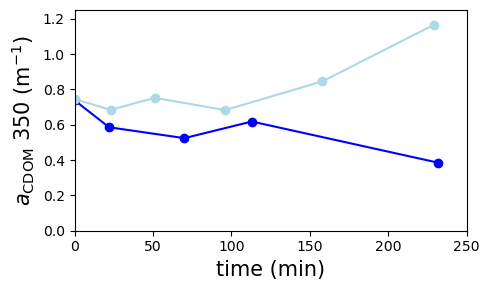

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


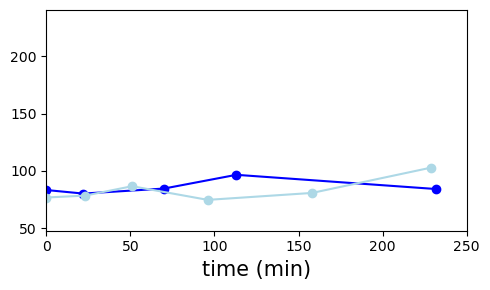

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


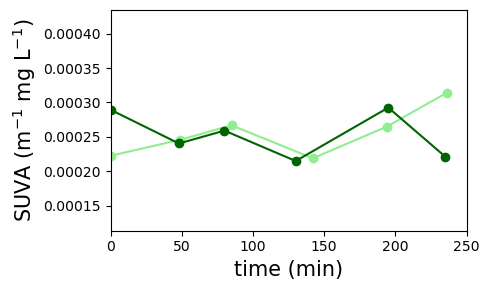

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


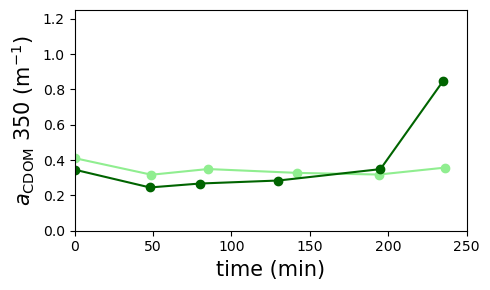

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


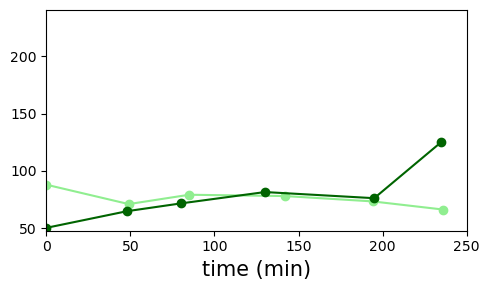

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


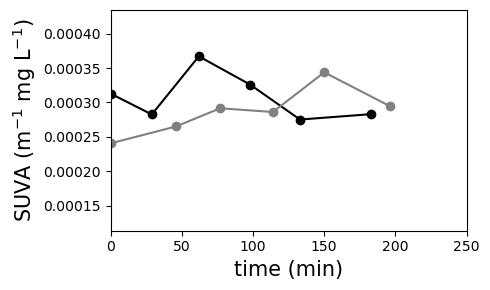

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


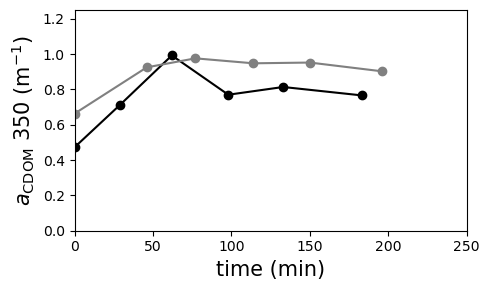

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()


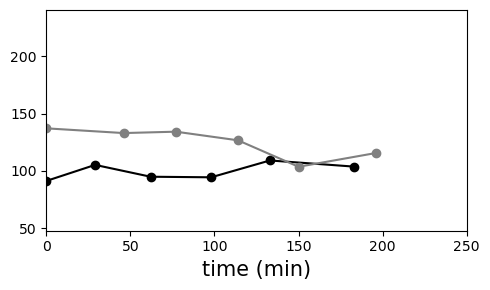

In [8]:
# Define custom colors
color_map = {
    'CL11': 'darkred',
    'CL13': 'red',
    'CL5': 'pink',
    'D': 'blue',
    'I': 'lightblue',
    'E': 'lightgreen',
    'N': 'darkgreen',
    'PA': 'black',
    'PB': 'grey',
}

def plot_incubation(x_var,y_var,z_var,ds):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
    
    for exps in exps_list: 
        model = LinearRegression()
        sub = ds[ds['EXPS_GROUP'] == exps]
        
        if sub.empty:
            continue  # Skip if no data for this group
        sub[x_var] = sub[x_var] - sub[x_var].min()
        sub = sub[sub[x_var] <= 250]
        sub = sub.dropna(subset=[x_var, y_var])
        data = sub[[x_var, y_var, z_var]]

        data_avg = sub.groupby(x_var)[y_var].mean().reset_index()  # Averaging by x_var
        data_avg = data_avg.merge(sub[[x_var, z_var]].drop_duplicates(), on=x_var, how='left')
        
        color = color_map.get(exps, 'black')  # Default to black if the group is not in the map

        axes.plot(data_avg[x_var], data_avg[y_var], color=color, marker='o')
    
    # Formatting
    axes.set_xlabel(x_lab, size=15)
    axes.set_ylabel(y_lab, size=15)
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(y_min, y_max)
    
    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/MSD_EXPS_{y_var}_{save_name}.png')

    plt.show()

###############################################################################################################
exps_list = ['CL11', 'CL13', 'CL5']
save_name = 'CL'

x_var = 'time'
y_var = 'SUVA'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'SUVA (m$^{-1}$ mg L$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['SUVA'].max()*1.05
y_min = ds['SUVA'].min()*.95
x_max = 250
x_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'NPOC_uM'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['NPOC_uM'].max()*1.05
y_min = ds['NPOC_uM'].min()*.95

plot_incubation(x_var,y_var,z_var,ds)


x_var = 'time'
y_var = 'Fe2_nm'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 100
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = ['D', 'I']
save_name = 'D_I'


x_var = 'time'
y_var = 'SUVA'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'SUVA (m$^{-1}$ mg L$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['SUVA'].max()*1.05
y_min = ds['SUVA'].min()*.95
x_max = 250
x_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'acdom_320_bc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 1.25
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'NPOC_uM'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['NPOC_uM'].max()*1.05
y_min = ds['NPOC_uM'].min()*.95

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = ['E', 'N']
save_name = 'E_N'

x_var = 'time'
y_var = 'SUVA'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'SUVA (m$^{-1}$ mg L$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['SUVA'].max()*1.05
y_min = ds['SUVA'].min()*.95
x_max = 250
x_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'acdom_320_bc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 1.25
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'NPOC_uM'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['NPOC_uM'].max()*1.05
y_min = ds['NPOC_uM'].min()*.95

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = [ 'PA', 'PB']
save_name = 'Pa_Pb'

x_var = 'time'
y_var = 'SUVA'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'SUVA (m$^{-1}$ mg L$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['SUVA'].max()*1.05
y_min = ds['SUVA'].min()*.95
x_max = 250
x_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'acdom_320_bc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r'$a_{\mathrm{CDOM}}$ 350 (m$^{-1}$)'
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 1.25
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

x_var = 'time'
y_var = 'NPOC_uM'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = ds['NPOC_uM'].max()*1.05
y_min = ds['NPOC_uM'].min()*.95

plot_incubation(x_var,y_var,z_var,ds)


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub[x_var] = sub[x_var] - sub[x_var].min()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_3668\386245934.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

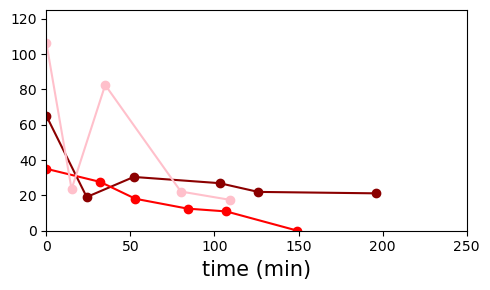

In [12]:
exps_list = ['CL11', 'CL13', 'CL5']
save_name = 'CL'

x_var = 'time'
y_var = 'Fe2_nm'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 125
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

In [7]:
df_all

Type Treat EXPS_GROUP Time_group  acdom_254_bc  acdom_320_bc  \
0    EXPS  P02F       CL11         T1      2.064346      0.387264   
1    EXPS   P2F       CL11         T1      1.853539      0.379534   
2    EXPS   RAW       CL11         T1           NaN           NaN   
3    EXPS  P02F       CL11         T2      1.493064      0.364795   
4    EXPS  P02F       CL11         T2      1.495296      0.351935   
..    ...   ...        ...        ...           ...           ...   
231  EXPS   P2F         PB         T5      2.967783      0.950621   
232  EXPS   RAW         PB         T5           NaN           NaN   
233  EXPS  P02F         PB         T6      2.485269      0.662532   
234  EXPS   P2F         PB         T6      2.840138      0.902837   
235  EXPS   RAW         PB         T6           NaN           NaN   

     acdom_350_bc  acdom_412_bc  acdom_440_bc  acdom_700_bc  ...    time   O2  \
0        0.212771      0.033355      0.002477     -0.056503  ...   966.0  3.4   
1        0.229835      0.074617      0.046473     -0.020547  ...   966.0  3.4   
2             NaN           NaN           NaN           NaN  ...     NaN  NaN   
3        0.274939      0.052255      0.023645     -0.028741  ...   990.0  2.0   
4        0.258807      0.038422      0.007543     -0.050976  ...   990.0  2.0   
..            ...           ...           ...           ...  ...     ...  ...   
231      0.624992      0.292954      0.194556     -0.007075  ...   995.0  1.4   
232           NaN           NaN           NaN           NaN  ...     NaN  NaN   
233      0.422828      0.204686      0.134956      0.008963  ...  1041.0  1.4   
234      0.587679      0.270560      0.177148      0.007510  ...  1041.0  1.4   
235           NaN           NaN           NaN           NaN  ...     NaN  NaN   

     Fe2_nm       FeT_nm       Fe3_nm     NPOC_uM      TN_uM      Fe3_%  \
0    68.927   120.937000    52.010000   89.679167  25.578571  43.005863   
1    65.092    75.600000    10.508000   53.737500  16.785714  13.899471   
2    34.197   651.124000   616.927000   63.020833  18.517857  94.748005   
3    30.633    73.632000    42.999000   68.983333  19.182143  58.397164   
4    30.633    73.632000    42.999000   68.983333  19.182143  58.397164   
..      ...          ...          ...         ...        ...        ...   
231  29.277   493.695652   464.418652  103.625000  29.671429  94.069828   
232  34.324  1462.531182  1428.207182         NaN        NaN  97.653110   
233   3.075    67.305105    64.230105   98.791667  28.396429  95.431253   
234  21.452   354.451282   332.999282  115.625000  35.589286  93.947828   
235  29.468   575.955444   546.487445         NaN        NaN  94.883632   

         SUVA  SUVA_350  
0    0.000276  0.002373  
1    0.000414  0.004277  
2         NaN       NaN  
3    0.000260  0.003986  
4    0.000260  0.003752  
..        ...       ...  
231  0.000344  0.006031  
232       NaN       NaN  
233  0.000302  0.004280  
234  0.000295  0.005083  
235       NaN       NaN  

[236 rows x 24 columns]

In [ ]:
# Define custom colors
color_map = {
    'CL11': 'darkred',
    'CL13': 'red',
    'CL5': 'pink',
    'D': 'blue',
    'I': 'lightblue',
    'E': 'lightgreen',
    'N': 'darkgreen',
    'PA': 'black',
    'PB': 'grey',
}

def plot_incubation(x_var,y_var,z_var,ds):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
    
    for exps in exps_list: 
        model = LinearRegression()
        sub = ds[ds['EXPS_GROUP'] == exps]
        
        if sub.empty:
            continue  # Skip if no data for this group
        sub[x_var] = sub[x_var] - sub[x_var].min()
        sub = sub[sub[x_var] <= 250]
        data = sub[[x_var, y_var, z_var, y2_var]]

        data_avg = sub.groupby(x_var)[[y_var]].mean().reset_index()
        data_avg = data_avg.merge(sub[[x_var, z_var]].drop_duplicates(), on=x_var, how='left')

        data_avg2 = sub.groupby(x_var)[[y2_var]].mean().reset_index()
        data_avg2 = data_avg2.merge(sub[[x_var, z_var]].drop_duplicates(), on=x_var, how='left')
        data_avg2 = data_avg2.dropna(subset=[x_var, y2_var])
        
        color = color_map.get(exps, 'black')  # Default to black if the group is not in the map
        print(data_avg)
        axes.plot(data_avg[x_var], data_avg[y_var], color=color, marker='o')
        axes.plot(data_avg2[x_var], data_avg2[y2_var], color=color, marker='s', markerfacecolor='white', markeredgecolor=color)
    
    # Formatting
    axes.set_xlabel(x_lab, size=15)
    axes.set_ylabel(y_lab, size=15)
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(y_min, y_max)
    
    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/MSD_EXPS_{y_var}_{save_name}.png')

    plt.show()

###############################################################################################################
exps_list = ['CL11', 'CL13', 'CL5']
save_name = 'CL'

x_var = 'time'
y_var = 'Fe2_nm'
y2_var = 'Fe3_nm'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 600
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = ['D', 'I']
save_name = 'D_I'

x_var = 'time'
y_var = 'Fe2_nm'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 1000
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)


###############################################################################################################
exps_list = ['E', 'N']
save_name = 'E_N'

x_var = 'time'
y_var = 'Fe2_nm'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 110
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = [ 'PA', 'PB']
save_name = 'Pa_Pb'

x_var = 'time'
y_var = 'Fe2_nm'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_all[df_all['Treat'] == 'P2F']
ds = ds[ds['SUVA'] <= .001]
y_max = 475
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

In [ ]:
def calculate_infec(df_cdom):
    df_cdom["a350_norm"] = (df_cdom["a350"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
    df_cdom["a325_norm"] = (df_cdom["a325"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
    df_cdom["a375_norm"] = (df_cdom["a375"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
    df_cdom["a_infelc"] = df_cdom["a350_norm"] / ((df_cdom["a325_norm"] + df_cdom["a375_norm"])/2)


In [ ]:
ds

In [ ]:
df_spectra_blanks = pd.read_csv('../Cruise_2024/Data/ABS/_DATA_SUMS/sprectra_pchip_baseline_corrected_MDS_blanks.csv', sep=',', index_col=0)
df_abs_blanks = pd.read_csv('../Cruise_2024/Data/ABS/_DATA_SUMS/CDOM_outputs_MDS_blanks.csv', sep=',', index_col=0)
df_abs_blanks = df_abs_blanks.drop('file_id', axis = 1)
df_spectra_blanks = df_spectra_blanks.drop('file_id', axis = 1)

df_abs_blanks = df_abs_blanks.groupby(df_abs_blanks.index).mean()
df_spectra_blanks = df_spectra_blanks.groupby(df_spectra_blanks.index).mean()


In [ ]:
df_spectra = pd.read_csv('../Cruise_2024/Data/EXPS/sprectra_pchip_baseline_corrected_EX.csv', sep=',', index_col=0)
df_spectra_notbc = pd.read_csv('../Cruise_2024/Data/EXPS/sprectra_pchip_EX_MDS.csv', sep=',', index_col=0)

df_spectra_notbc['Sample_ID'] = df_spectra['Sample_ID']
df_spectra_notbc['Type'] = df_spectra['Type']
df_spectra_notbc['EXPS_GROUP'] = df_spectra['EXPS_GROUP']
df_spectra_notbc['Time_group'] = df_spectra['Time_group']
df_spectra_notbc['Treat'] = df_spectra['Treat']

df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
df_spectra_exps_notbc = df_spectra_notbc[df_spectra_notbc['Type'] == "EXPS"]
df_spectra_exps

In [ ]:
df_spectra_exps = df_spectra_exps.merge(
    df_time[['EXPS_GROUP', 'Time_group', 'Time', 'time', 'O2']],
    on=['EXPS_GROUP', 'Time_group'],
    how='left'
)

In [ ]:
def calculate_infec(df_cdom):
    df_cdom["a350_norm"] = (df_cdom["a350"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
    df_cdom["a325_norm"] = (df_cdom["a325"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
    df_cdom["a375_norm"] = (df_cdom["a375"] - df_cdom["a400"]) / (df_cdom["a300"] - df_cdom["a400"])
    df_cdom["a_infelc"] = df_cdom["a350_norm"] / ((df_cdom["a325_norm"] + df_cdom["a375_norm"])/2)

calculate_infec(df_spectra_exps)

df_spectra_exps

In [ ]:
# Define custom colors
color_map = {
    'CL11': 'darkred',
    'CL13': 'red',
    'CL5': 'pink',
    'D': 'blue',
    'I': 'lightblue',
    'E': 'lightgreen',
    'N': 'darkgreen',
    'PA': 'black',
    'PB': 'grey',
}

def plot_incubation(x_var,y_var,z_var,ds):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
    
    for exps in exps_list: 
        model = LinearRegression()
        sub = ds[ds['EXPS_GROUP'] == exps]

        
        if sub.empty:
            continue  # Skip if no data for this group
        sub[x_var] = sub[x_var] - sub[x_var].min()
        sub = sub[sub[x_var] <= 250]
        data = sub[[x_var, y_var, z_var, y2_var]]

        data_avg = sub.groupby(x_var)[[y_var]].mean().reset_index()
        data_avg = data_avg.merge(sub[[x_var, z_var]].drop_duplicates(), on=x_var, how='left')

        data_avg2 = sub.groupby(x_var)[[y2_var]].mean().reset_index()
        data_avg2 = data_avg2.merge(sub[[x_var, z_var]].drop_duplicates(), on=x_var, how='left')
        data_avg2 = data_avg2.dropna(subset=[x_var, y2_var])
        
        color = color_map.get(exps, 'black')  # Default to black if the group is not in the map
        print(data_avg)
        axes.plot(data_avg[x_var], data_avg[y_var], color=color, marker='o')
        axes.plot(data_avg2[x_var], data_avg2[y2_var], color=color, marker='s', markerfacecolor='white', markeredgecolor=color)
    
    # Formatting
    axes.set_xlabel(x_lab, size=15)
    axes.set_ylabel(y_lab, size=15)
    axes.set_xlim(x_min, x_max)
    axes.set_ylim(y_min, y_max)
    
    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/MSD_EXPS_{y_var}_{save_name}.png')

    plt.show()

###############################################################################################################
exps_list = ['CL11', 'CL13', 'CL5']
save_name = 'CL'

x_var = 'time'
y_var = 'a350'
y2_var = 'a_infelc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_spectra_exps[df_spectra_exps['Treat'] == 'P2F']
y_max = 1.3
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = ['D', 'I']
save_name = 'D_I'

x_var = 'time'
y_var = 'a350'
y2_var = 'a_infelc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_spectra_exps[df_spectra_exps['Treat'] == 'P2F']
#ds = ds[ds['SUVA'] <= .001]
y_max = 1.3
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)


###############################################################################################################
exps_list = ['E', 'N']
save_name = 'E_N'

x_var = 'time'
y_var = 'a350'
y2_var = 'a_infelc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_spectra_exps[df_spectra_exps['Treat'] == 'P2F']
#ds = ds[ds['SUVA'] <= .001]
y_max = 1.3
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

###############################################################################################################
exps_list = [ 'PA', 'PB']
save_name = 'Pa_Pb'

x_var = 'time'
y_var = 'a350'
y2_var = 'a_infelc'
z_var = 'EXPS_GROUP'
x_lab = r'time (min)'
y_lab = r''
ds = df_spectra_exps[df_spectra_exps['Treat'] == 'P2F']
#ds = ds[ds['SUVA'] <= .001]
y_max = 1.3
y_min = 0

plot_incubation(x_var,y_var,z_var,ds)

##PLOTS 

In [ ]:
#['CL11', 'CL13', 'CL5', 'D', 'E', 'I', 'N', 'PA', 'PB'],
def plotplot(Choice):
    ds_fe = df_doc_exps[df_doc_exps['EXPS_GROUP'] == Choice]
    ds_abs = df_abs_exps[df_abs_exps['EXPS_GROUP'] == Choice]

    ds_abs_raw = ds_abs[ds_abs['Treat'] == 'RAW']
    ds_abs_p2f = ds_abs[ds_abs['Treat'] == 'P2F']
    ds_abs_p02f = ds_abs[ds_abs['Treat'] == 'P02F']

    ds_fe_raw = ds_fe[ds_fe['Treat'] == 'RAW']
    ds_fe_p2f = ds_fe[ds_fe['Treat'] == 'P2F']
    ds_fe_p02f = ds_fe[ds_fe['Treat'] == 'P02F']

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# First line
    ax.plot(ds_abs_p02f["time"], ds_abs_p02f["acdom_350_bc"], c='grey', lw=.75, marker='o', label='P02F')
    ax.set_ylim(0, ds_abs['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'(P02F) $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', c='grey')
    ax.set_xlabel('Time')

# Second line with a second y-axis
    ax2 = ax.twinx()
    ax2.plot(ds_abs_p2f["time"], ds_abs_p2f["acdom_350_bc"], c='b', lw=.75, marker='o', label='P2F')
    ax2.set_ylim(0, ds_abs['acdom_350_bc'].max()*1.1)
    ax2.set_ylabel(r'(P2F) $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', c='b')
    ax2.spines['right'] # Offset the second y-axis

# Third line with a third y-axis
    ax3 = ax.twinx()
    ax3.plot(ds_abs_raw["time"], ds_abs_raw["acdom_350_bc"], c='g', lw=.75, marker='o', label='Raw')
    ax3.set_ylim(0, ds_abs['acdom_350_bc'].max()*1.1)
    ax3.set_ylabel(r'(RAW) $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', c='g')
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis

# Fourth line with a fourth y-axis
    ax4 = ax.twinx()
    ax4.plot(ds_fe_p02f["time"], ds_fe_p02f["NPOC_uM"], c='black', lw=.75, marker='p', label='DOC P02F')
    ax4.set_ylim(0, ds_fe['NPOC_uM'].max()*1.1)
    ax4.set_ylabel('DOC (P02F)')
    ax4.spines['right'].set_position(('outward', 120))  # Offset the fourth y-axis

# Fifth line with a fifth y-axis
    ax5 = ax.twinx()
    ax5.plot(ds_fe_p2f["time"], ds_fe_p2f["NPOC_uM"], c='blue', lw=.75, marker='p', label='DOC P2F')
    ax5.set_ylim(0, ds_fe['NPOC_uM'].max()*1.1)
    ax5.set_ylabel('DOC (P2F)', c='blue')
    ax5.spines['right'].set_position(('outward', 180))  # Offset the fifth y-axis

# Sixth line with a sixth y-axis
    ax6 = ax.twinx()
    ax6.plot(ds_fe_raw["time"], ds_fe_raw["NPOC_uM"], c='green', lw=.75, marker='p', label='DOC Raw')
    ax6.set_ylim(0, ds_fe['NPOC_uM'].max()*1.1)
    ax6.set_ylabel('DOC (Raw)', c='green')
    ax6.spines['right'].set_position(('outward', 240))  # Offset the sixth y-axis

# Adjust layout to make space for multiple y-axes
    ax.set_title(f'{Choice}')
    fig.tight_layout()
    fig.set_facecolor('w')

    plt.show()

plotplot('CL5')

In [ ]:
#['CL11', 'CL13', 'CL5', 'D', 'E', 'I', 'N', 'PA', 'PB'],
def plotplot(Choice):
    ds_fe = df_iron_exps[df_iron_exps['EXPS_GROUP'] == Choice]
    ds_abs = df_abs_exps[df_abs_exps['EXPS_GROUP'] == Choice]

    ds_abs_raw = ds_abs[ds_abs['Treat'] == 'RAW']
    ds_abs_p2f = ds_abs[ds_abs['Treat'] == 'P2F']
    ds_abs_p02f = ds_abs[ds_abs['Treat'] == 'P02F']

    ds_fe_raw = ds_fe[ds_fe['Treat'] == 'RAW']
    ds_fe_p2f = ds_fe[ds_fe['Treat'] == 'P2F']
    ds_fe_p02f = ds_fe[ds_fe['Treat'] == 'P02F']

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# First line
    ax.plot(ds_abs_p02f["time"], ds_abs_p02f["acdom_350_bc"], c='grey', lw=.75, marker='o', label='P02F')
    ax.set_ylim(0, ds_abs['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'(P02F) $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', c='grey')
    ax.set_xlabel('Time')

# Second line with a second y-axis
    ax2 = ax.twinx()
    ax2.plot(ds_abs_p2f["time"], ds_abs_p2f["acdom_350_bc"], c='b', lw=.75, marker='o', label='P2F')
    ax2.set_ylim(0, ds_abs['acdom_350_bc'].max()*1.1)
    ax2.set_ylabel(r'(P2F) $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', c='b')
    ax2.spines['right'] # Offset the second y-axis

# Third line with a third y-axis
    ax3 = ax.twinx()
    ax3.plot(ds_abs_raw["time"], ds_abs_raw["acdom_350_bc"], c='g', lw=.75, marker='o', label='Raw')
    ax3.set_ylim(0, ds_abs['acdom_350_bc'].max()*1.1)
    ax3.set_ylabel(r'(RAW) $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', c='g')
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis

# Fourth line with a fourth y-axis
    ax4 = ax.twinx()
    ax4.plot(ds_fe_p02f["time"], ds_fe_p02f["Fe2_nm"], c='black', lw=.75, marker='p', label='Fe2 P02F')
    ax4.set_ylim(0, ds_fe['Fe2_nm'].max()*1.1)
    ax4.set_ylabel('Fe2_nm (P02F)')
    ax4.spines['right'].set_position(('outward', 120))  # Offset the fourth y-axis

# Fifth line with a fifth y-axis
    ax5 = ax.twinx()
    ax5.plot(ds_fe_p2f["time"], ds_fe_p2f["Fe2_nm"], c='blue', lw=.75, marker='p', label='Fe2 P2F')
    ax5.set_ylim(0, ds_fe['Fe2_nm'].max()*1.1)
    ax5.set_ylabel('Fe2_nm (P2F)', c='blue')
    ax5.spines['right'].set_position(('outward', 180))  # Offset the fifth y-axis

# Sixth line with a sixth y-axis
    ax6 = ax.twinx()
    ax6.plot(ds_fe_raw["time"], ds_fe_raw["Fe2_nm"], c='green', lw=.75, marker='p', label='Fe2 Raw')
    ax6.set_ylim(0, ds_fe['Fe2_nm'].max()*1.1)
    ax6.set_ylabel('Fe2_nm (Raw)', c='green')
    ax6.spines['right'].set_position(('outward', 240))  # Offset the sixth y-axis

# Adjust layout to make space for multiple y-axes
    ax.set_title(f'{Choice}')
    fig.tight_layout()
    fig.set_facecolor('w')

    plt.show()

plotplot('CL5')




In [ ]:
#['CL11', 'CL13', 'CL5', 'D', 'E', 'I', 'N', 'PA', 'PB'],
def plotplot(Choice):
    ds_fe = df_iron_exps[df_iron_exps['EXPS_GROUP'] == Choice]
    ds_abs = df_abs_exps[df_abs_exps['EXPS_GROUP'] == Choice]

    ds_abs['ratio'] = ds_abs['acdom_350_bc'] / ((ds_abs['acdom_412_bc'] + ds_abs['acdom_320_bc']) /2 )
    
    ds_abs_raw = ds_abs[ds_abs['Treat'] == 'RAW']
    ds_abs_p2f = ds_abs[ds_abs['Treat'] == 'P2F']
    ds_abs_p02f = ds_abs[ds_abs['Treat'] == 'P02F']

    ds_fe_raw = ds_fe[ds_fe['Treat'] == 'RAW']
    ds_fe_p2f = ds_fe[ds_fe['Treat'] == 'P2F']
    ds_fe_p02f = ds_fe[ds_fe['Treat'] == 'P02F']

    fig, ax = plt.subplots(1, 1, figsize=(8, 3))

# First line
    ax.plot(ds_abs_p02f["time"], ds_abs_p02f["ratio"], c='black', lw=.75, marker='o', label='P02F')
    ax.set_ylim(0, ds_abs['ratio'].max()*1.1)
    ax.set_ylabel(r'P02F $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)')
    ax.set_xlabel('minuts')

# Second line with a second y-axis
    ax2 = ax.twinx()
    ax2.plot(ds_abs_p2f["time"], ds_abs_p2f["ratio"], c='blue', lw=.75, marker='o', label='P2F')
    ax2.set_ylim(0, ds_abs['ratio'].max()*1.1)
    ax2.set_ylabel(r'P2F $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', color = 'blue')
    ax2.spines['right'] # Offset the second y-axis

# Adjust layout to make space for multiple y-axes
    ax.set_title(f'{Choice}')
    fig.tight_layout()
    fig.set_facecolor('w')

    plt.show()

plotplot('CL5')
plotplot('CL11')
plotplot('CL13')

##ds_abs = df_abs_exps[df_abs_exps['EXPS_GROUP'] == 'CL5']
#ds_abs

In [ ]:
#['CL11', 'CL13', 'CL5', 'D', 'E', 'I', 'N', 'PA', 'PB'],
def plotplot(Choice):
    ds_fe = df_iron_exps[df_iron_exps['EXPS_GROUP'] == Choice]
    ds_abs = df_abs_exps[df_abs_exps['EXPS_GROUP'] == Choice]

    ds_abs['ratio'] = ds_abs['acdom_350_bc'] / ((ds_abs['acdom_412_bc'] + ds_abs['acdom_320_bc'])/2)
    
    ds_abs_raw = ds_abs[ds_abs['Treat'] == 'RAW']
    ds_abs_p2f = ds_abs[ds_abs['Treat'] == 'P2F']
    ds_abs_p02f = ds_abs[ds_abs['Treat'] == 'P02F']

    ds_fe_raw = ds_fe[ds_fe['Treat'] == 'RAW']
    ds_fe_p2f = ds_fe[ds_fe['Treat'] == 'P2F']
    ds_fe_p02f = ds_fe[ds_fe['Treat'] == 'P02F']

    fig, ax = plt.subplots(1, 1, figsize=(8, 3))

    ds_abs_raw['acdom_350over412_bc'] = ds_abs_raw['acdom_350_bc'] / ds_abs_raw['acdom_412_bc']
    ds_abs_p2f['acdom_350over412_bc'] = ds_abs_p2f['acdom_350_bc'] / ds_abs_p2f['acdom_412_bc']
    ds_abs_p02f['acdom_350over412_bc'] = ds_abs_p02f['acdom_350_bc'] / ds_abs_p02f['acdom_412_bc']
    
# First line
    ax.plot(ds_abs_p02f["time"], ds_abs_p02f["acdom_350_bc"], c='black', lw=.75, marker='o', label='P02F')
    ax.set_ylim(0, ds_abs_p02f['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'P02F $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)')
    ax.set_xlabel('minuts')

# Second line with a second y-axis
    ax2 = ax.twinx()
    ax2.plot(ds_abs_p2f["time"], ds_abs_p2f["acdom_350_bc"], c='blue', lw=.75, marker='o', label='P2F')
    ax2.set_ylim(ds_abs_p2f['acdom_350_bc'].min()-(ds_abs_p2f['acdom_350over412_bc'].max()*0.1), ds_abs_p2f['acdom_350over412_bc'].max()*1.1)
    ax2.set_ylabel(r'P2F $a_{\mathrm{CDOM}}$ 350 (nm) (m$^{-1}$)', color = 'blue')
    ax2.spines['right'] # Offset the second y-axis

# Adjust layout to make space for multiple y-axes
    ax.set_title(f'{Choice}')
    fig.tight_layout()
    fig.set_facecolor('w')

    plt.show()

plotplot('CL5')
ds_abs = df_abs_exps[df_abs_exps['EXPS_GROUP'] == 'CL5']
ds_abs
plotplot('CL11')
plotplot('CL13')
plotplot('D')
plotplot('E')
plotplot('I')
plotplot('N')


In [ ]:
color_map = {
    'CL11': 'darkred',
    'CL13': 'red',
    'CL5': 'pink',
    'D': 'blue',
    'I': 'lightblue',
    'E': 'lightgreen',
    'N': 'darkgreen',
    'PA': 'black',
    'PB': 'grey',
}
def plotspectra(EXPS_GROUP, Treat, X):
    df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
    ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds = ds[ds['Treat'] == Treat]    

    ds.index = ds["Time_group"]
    ds = ds.drop('Type', axis=1)
    ds = ds.drop('Sample_ID', axis=1)
    ds = ds.drop('EXPS_GROUP', axis=1)
    ds = ds.drop('Time_group', axis=1)
    ds = ds.drop('Treat', axis=1)

    ds = ds.T
    ds['WL'] = range(250, 250 + len(ds))
    duplicate_cols = ds.columns[ds.columns.duplicated()]
    averaged_cols = ds.groupby(level=0, axis=1).mean()
    ds = averaged_cols

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    colors = {'T1': 'red','T2': 'orange','T3': '#d8d81d',  'T4': 'green','T5': 'blue',  'T6': 'white'}

    for col in ds.columns:
        if col != 'WL': 
            color = colors.get(col, 'black')  # Default to black if column name is not in colors
            ax.plot(ds['WL'], ds[col], label=col, color=color, linewidth=.75)

    ax.set_ylim(0,X)
    ax.set_xlim(285,425)

    ax.set_xlabel('Wavelength (nm)', size = 12)
    ax.set_ylabel('$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size = 12)
    ax.set_title(f'')
    fig.text(0.75, 0.75, f'{EXPS_GROUP}', fontsize=20, fontweight='bold', ha='center', va='center', color=color_map.get(EXPS_GROUP, 'black'))
    fig.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/MSD_EXPS_spectra_{EXPS_GROUP}.png')
    plt.show()

plotspectra('CL5', 'P2F', 1.2)

def plotspectra(EXPS_GROUP, Treat, X):
    df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
    ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds = ds[ds['Treat'] == Treat]

    ds.index = ds["Time_group"]
    ds = ds.drop('Type', axis=1)
    ds = ds.drop('Sample_ID', axis=1)
    ds = ds.drop('EXPS_GROUP', axis=1)
    ds = ds.drop('Time_group', axis=1)
    ds = ds.drop('Treat', axis=1)

    ds = ds.T
    ds['WL'] = range(250, 250 + len(ds))
    duplicate_cols = ds.columns[ds.columns.duplicated()]
    averaged_cols = ds.groupby(level=0, axis=1).mean()
    ds = averaged_cols

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    colors = {'T1': 'red','T2': 'orange','T3': '#d8d81d',  'T4': 'green','T5': 'blue',  'T6': 'purple'}

    for col in ds.columns:
        if col != 'WL': 
            color = colors.get(col, 'black')  # Default to black if column name is not in colors
            ax.plot(ds['WL'], ds[col], label=col, color=color, linewidth=.75)

    ax.set_ylim(0,X)
    ax.set_xlim(285,425)

    ax.set_xlabel('Wavelength (nm)', size = 12)
    ax.set_ylabel('$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size = 12)
    ax.set_title(f'')
    fig.text(0.75, 0.75, f'{EXPS_GROUP}', fontsize=20, fontweight='bold', ha='center', va='center', color=color_map.get(EXPS_GROUP, 'black'))
    fig.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Poxy_paper_figs/MSD_EXPS_spectra_{EXPS_GROUP}.png')
    plt.show()

plotspectra('CL11', 'P2F', 1.)
plotspectra('CL13', 'P2F', 1.5)


In [ ]:
plotspectra('D', 'P2F', 1.65)
plotspectra('I', 'P2F', 1.7)

plotspectra('N', 'P2F', 1.75)
plotspectra('E', 'P2F', 1)

In [ ]:
plotspectra('PA', 'P2F', 2)
plotspectra('PB', 'P2F', 2)

In [ ]:


def plotspectra(EXPS_GROUP, Treat, X):
    df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
    ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds = ds[ds['Treat'] == Treat]

    ds.index = ds["Time_group"]
    ds = ds.drop('Type', axis=1)
    ds = ds.drop('Sample_ID', axis=1)
    ds = ds.drop('EXPS_GROUP', axis=1)
    ds = ds.drop('Time_group', axis=1)
    ds = ds.drop('Treat', axis=1)

    ds = ds.T
    ds['WL'] = range(250, 250 + len(ds))

    fig, ax = plt.subplots(1, 1, figsize=(6, 3))

    colors = {'T1': 'red','T2': 'orange','T3': 'yellow',  'T4': 'green','T5': 'blue',  'T6': 'purple'}

    for col in ds.columns:
        if col != 'WL': 
            color = colors.get(col, 'black')  # Default to black if column name is not in colors
            ax.plot(ds['WL'], ds[col], label=col, color=color)

    ax.set_ylim(-.10,X)
    ax.set_xlim(275,555)

    ax.set_xlabel('WL')
    ax.set_ylabel('Abs')
    ax.set_title(f'{EXPS_GROUP} {Treat}')
    plt.show()

plotspectra('CL5', 'P02F', 4.5)
plotspectra('CL5', 'P2F', 4.5)
plotspectra('CL5', 'RAW', 4.5)



In [ ]:

plotspectra('CL11', 'P02F', 2)
plotspectra('CL11', 'P2F', 2)


In [ ]:

plotspectra('CL13', 'P02F', 3) 
plotspectra('CL13', 'P2F', 3) 
plotspectra('CL13', 'RAW', 3) 

In [ ]:
Ylim = 3
plotspectra('D', 'P02F', Ylim)
plotspectra('D', 'P2F', Ylim)
plotspectra('D', 'RAW', Ylim)


In [ ]:

plotspectra('E', 'P02F', Ylim)
plotspectra('E', 'P2F', Ylim)


In [ ]:

plotspectra('N', 'P02F', Ylim)
plotspectra('N', 'P2F', Ylim)


In [ ]:
plotspectra('I', 'P02F', Ylim)
plotspectra('I', 'P2F', Ylim)
plotspectra('I', 'RAW', Ylim)

In [ ]:
plotspectra('PA', 'P02F', 3) 
plotspectra('PA', 'P2F', 3) 
plotspectra('PA', 'RAW', 3)

In [ ]:
plotspectra('PB', 'P02F', 3)
plotspectra('PB', 'P2F', 3)
plotspectra('PB', 'RAW', 3)

def plotspectra(EXPS_GROUP, Treat, X):
    df_spectra_exps = df_spectra_notbc[df_spectra_notbc['Type'] == "EXPS"]
    ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds = ds[ds['Treat'] == Treat]

    ds.index = ds["Time_group"]
    ds = ds.drop('Type', axis=1)
    ds = ds.drop('Sample_ID', axis=1)
    ds = ds.drop('EXPS_GROUP', axis=1)
    ds = ds.drop('Time_group', axis=1)
    ds = ds.drop('Treat', axis=1)

    ds = ds.T
    ds['WL'] = range(250, 250 + len(ds))

    fig, ax = plt.subplots(1, 1, figsize=(6, 3))

    colors = {'T1': 'red','T2': 'orange','T3': 'yellow',  'T4': 'green','T5': 'blue',  'T6': 'purple'}

    for col in ds.columns:
        if col != 'WL': 
            color = colors.get(col, 'black')  # Default to black if column name is not in colors
            ax.plot(ds['WL'], ds[col], label=col, color=color)

    ax.set_ylim(-.10,X)
    ax.set_xlim(275,555)

    ax.set_xlabel('WL')
    ax.set_ylabel('Abs')
    ax.set_title(f'{EXPS_GROUP} {Treat}')
    plt.show()

plotspectra('CL5', 'P02F', 4.5)
plotspectra('CL5', 'P2F', 4.5)
plotspectra('CL5', 'RAW', 4.5)

plotspectra('CL11', 'P02F', 4)
plotspectra('CL11', 'P2F', 4)

plotspectra('CL13', 'P02F', 3) 
plotspectra('CL13', 'P2F', 3) 
plotspectra('CL13', 'RAW', 3) 

In [ ]:
EXPS_GROUP = "CL5"

df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

ds_p02f = ds[ds['Treat'] == 'P02F']
ds_p2f = ds[ds['Treat'] == 'P2F']


ds_p2f.index = ds_p2f["Time_group"]
ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p2f = ds_p2f.T
ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

ds_p02f.index = ds_p02f["Time_group"]
ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p02f = ds_p02f.T
ds_p02f['WL'] = range(250, 250 + len(ds_p02f))

# Define colors for each column name
colors = {
    'T1': 'red',
    'T2': 'orange',
    'T3': 'yellow',  
    'T4': 'green',
    'T5': 'blue',  
    'T6': 'purple'
}

col_list = ['T1','T6']

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Plot each column vs 'WL'
for col in col_list:
    color = colors.get(col, 'black')  # Default to black if column name is not in colors
    ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
    ax.set_ylim(0,5)
    ax.set_xlim(275,450)

# Set labels and title
ax.set_xlabel('wavelength (nm)', fontsize = 15)
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', fontsize = 15)
ax.set_title(f'Experiment {EXPS_GROUP}', fontsize = 15)

# Show the plot
plt.show()


In [ ]:
EXPS_GROUP = "N"

df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

ds_p02f = ds[ds['Treat'] == 'P02F']
ds_p2f = ds[ds['Treat'] == 'P2F']


ds_p2f.index = ds_p2f["Time_group"]
ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p2f = ds_p2f.T
ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

ds_p02f.index = ds_p02f["Time_group"]
ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p02f = ds_p02f.T
ds_p02f['WL'] = range(250, 250 + len(ds_p02f))

# Define colors for each column name
colors = {
    'T1': 'red',
    'T2': 'orange',
    'T3': 'yellow',  
    'T4': 'green',
    'T5': 'blue',  
    'T6': 'purple'
}

col_list = ['T1','T6']

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Plot each column vs 'WL'
for col in col_list:
    color = colors.get(col, 'black')  # Default to black if column name is not in colors
    ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
    ax2 = ax.twiny()
    ax2.plot(ds_p02f['WL'], ds_p02f[col], label=col, color=color, linestyle = 'dashed')
    ax.set_ylim(0,5)
    ax.set_xlim(275,450)
    ax2.set_ylim(0,5)
    ax2.set_xlim(275,450)

# Set labels and title
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)')
ax.set_title(f'{EXPS_GROUP}')

# Show the plot
plt.show()


In [ ]:
EXPS_GROUP = "PA" 

df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

ds_p02f = ds[ds['Treat'] == 'P02F']
ds_p2f = ds[ds['Treat'] == 'P2F']
ds_raw = ds[ds['Treat'] == 'RAW']

ds_p2f.index = ds_p2f["Time_group"]
ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p2f = ds_p2f.T
ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

ds_p02f.index = ds_p02f["Time_group"]
ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p02f = ds_p02f.T
ds_p02f['WL'] = range(250, 250 + len(ds_p02f))


ds_raw.index = ds_raw["Time_group"]
ds_raw = ds_raw.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_raw = ds_raw.T
ds_raw['WL'] = range(250, 250 + len(ds_raw))

# Define colors for each column name
colors = {
    'T1': 'red',
    'T2': 'orange',
    'T3': 'yellow',  
    'T4': 'green',
    'T5': 'blue',  
    'T6': 'purple'
}

col_list = ['T1']

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Plot each column vs 'WL'
for col in col_list:
    color = colors.get(col, 'black')  # Default to black if column name is not in colors
    ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
    ax2 = ax.twiny()
    ax2.plot(ds_p02f['WL'], ds_p02f[col], label=col, color=color, linestyle = 'dashed')
    ax3 = ax.twiny()
    ax3.plot(ds_raw['WL'], ds_raw[col], label=col, color=color, linestyle = 'dashdot')
    ax.set_ylim(0,3)
    ax.set_xlim(275,450)
    ax2.set_ylim(0,3)
    ax2.set_xlim(275,450)
    ax3.set_ylim(0,3)
    ax3.set_xlim(275,450)

# Set labels and title
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)')
ax.set_title(f'{EXPS_GROUP}')

# Show the plot
plt.show()

In [ ]:
EXPS_GROUP = "PB" 

df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

ds_p02f = ds[ds['Treat'] == 'P02F']
ds_p2f = ds[ds['Treat'] == 'P2F']
ds_raw = ds[ds['Treat'] == 'RAW']

ds_p2f.index = ds_p2f["Time_group"]
ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p2f = ds_p2f.T
ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

ds_p02f.index = ds_p02f["Time_group"]
ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p02f = ds_p02f.T
ds_p02f['WL'] = range(250, 250 + len(ds_p02f))


ds_raw.index = ds_raw["Time_group"]
ds_raw = ds_raw.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_raw = ds_raw.T
ds_raw['WL'] = range(250, 250 + len(ds_raw))

# Define colors for each column name
colors = {
    'T1': 'red',
    'T2': 'orange',
    'T3': 'yellow',  
    'T4': 'green',
    'T5': 'blue',  
    'T6': 'purple'
}

col_list = ['T1']

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Plot each column vs 'WL'
for col in col_list:
    color = colors.get(col, 'black')  # Default to black if column name is not in colors
    ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
    ax2 = ax.twiny()
    ax2.plot(ds_p02f['WL'], ds_p02f[col], label=col, color=color, linestyle = 'dashed')
    ax3 = ax.twiny()
    ax3.plot(ds_raw['WL'], ds_raw[col], label=col, color=color, linestyle = 'dashdot')
    ax.set_ylim(0,3)
    ax.set_xlim(275,450)
    ax2.set_ylim(0,3)
    ax2.set_xlim(275,450)
    ax3.set_ylim(0,3)
    ax3.set_xlim(275,450)

# Set labels and title
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)')
ax.set_title(f'{EXPS_GROUP}')

# Show the plot
plt.show()

In [ ]:
EXPS_GROUP = "D" 

df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

ds_p02f = ds[ds['Treat'] == 'P02F']
ds_p2f = ds[ds['Treat'] == 'P2F']
ds_raw = ds[ds['Treat'] == 'RAW']

ds_p2f.index = ds_p2f["Time_group"]
ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p2f = ds_p2f.T
ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

ds_p02f.index = ds_p02f["Time_group"]
ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_p02f = ds_p02f.T
ds_p02f['WL'] = range(250, 250 + len(ds_p02f))


ds_raw.index = ds_raw["Time_group"]
ds_raw = ds_raw.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
ds_raw = ds_raw.T
ds_raw['WL'] = range(250, 250 + len(ds_raw))

# Define colors for each column name
colors = {
    'T1': 'red',
    'T2': 'orange',
    'T3': 'yellow',  
    'T4': 'green',
    'T5': 'blue',  
    'T6': 'purple'
}

col_list = ['T1','T6']

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Plot each column vs 'WL'
for col in col_list:
    color = colors.get(col, 'black')  # Default to black if column name is not in colors
    ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
    ax2 = ax.twiny()
    ax2.plot(ds_p02f['WL'], ds_p02f[col], label=col, color=color, linestyle = 'dashed')
    ax3 = ax.twiny()
    ax3.plot(ds_raw['WL'], ds_raw[col], label=col, color=color, linestyle = 'dashdot')
    ax.set_ylim(0,5)
    ax.set_xlim(275,450)
    ax2.set_ylim(0,5)
    ax2.set_xlim(275,450)
    ax3.set_ylim(0,5)
    ax3.set_xlim(275,450)

# Set labels and title
ax.set_xlabel('wavelength (nm)')
ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)')
ax.set_title(f'{EXPS_GROUP}')


# Show the plot
plt.show()

In [ ]:
#EXPS_GROUP = "PA" 
exps_list = df_spectra_exps['EXPS_GROUP'].unique()

def plot_spectra(EXPS_GROUP):
    df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
    ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p2f.index = ds_p2f["Time_group"]
    ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_p2f = ds_p2f.T
    ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

    ds_p02f.index = ds_p02f["Time_group"]
    ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_p02f = ds_p02f.T
    ds_p02f['WL'] = range(250, 250 + len(ds_p02f))
    
    ds_raw.index = ds_raw["Time_group"]
    ds_raw = ds_raw.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_raw = ds_raw.T
    ds_raw['WL'] = range(250, 250 + len(ds_raw))
    
    times = df_time[df_time['EXPS_GROUP'] == EXPS_GROUP]
    time_list = times['Time'].tolist()

    # Define colors for each column name
    colors = {
        'T1': 'red',
        'T2': 'orange',
        'T3': 'y',  
        'T4': 'green',
        'T5': 'blue',  
        'T6': 'purple'
    }

    col_list = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

    # Set up the figure and axis
    fig, axes = plt.subplots(1, len(col_list), figsize=(20, 4))

    # Plot each column vs 'WL'
    for i, col in enumerate(col_list):
        ax = axes[i]
        color = colors.get(col, 'black')  
        ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
        ax2 = ax.twiny()
        ax2.plot(ds_p02f['WL'], ds_p02f[col], label=col, color=color, linestyle = 'dashed')
        ax.set_ylim(0,4.5)
        ax.set_xlim(275,450)
        ax2.set_ylim(0,4.5)
        ax2.set_xlim(275,450)
        ax.set_xlabel('wavelength (nm)')
        ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)')
        ax.set_title(f'{EXPS_GROUP} {col} {time_list[i]}')

    fig.tight_layout()  
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/Spectral_EXPS_{EXPS_GROUP}.png')
    plt.show()

for exps in exps_list: 
    plot_spectra(exps)

In [ ]:
#EXPS_GROUP = "PA" 
exps_list = df_spectra_exps['EXPS_GROUP'].unique()

def plot_spectra(EXPS_GROUP):
    df_spectra_exps = df_spectra[df_spectra['Type'] == "EXPS"]
    ds = df_spectra_exps[df_spectra_exps['EXPS_GROUP'] == EXPS_GROUP]

    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p2f.index = ds_p2f["Time_group"]
    ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_p2f = ds_p2f.T
    ds_p2f['WL'] = range(250, 250 + len(ds_p2f))
    
    ds_raw.index = ds_raw["Time_group"]
    ds_raw = ds_raw.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_raw = ds_raw.T
    ds_raw['WL'] = range(250, 250 + len(ds_raw))
    
    times = df_time[df_time['EXPS_GROUP'] == EXPS_GROUP]
    time_list = times['Time'].tolist()

    # Define colors for each column name
    colors = {
        'T1': 'red',
        'T2': 'orange',
        'T3': 'y',  
        'T4': 'green',
        'T5': 'blue',  
        'T6': 'purple'
    }

    col_list = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

    # Set up the figure and axis
    fig, axes = plt.subplots(1, len(col_list), figsize=(25, 4))

    # Plot each column vs 'WL'
    for i, col in enumerate(col_list):
        ax = axes[i]
        color = colors.get(col, 'black')  
        ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
        ax.set_ylim(0,2)
        ax.set_xlim(275,450)
        ax.set_xlabel('wavelength (nm)', fontsize=15)
        ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', fontsize=15)
        ax.set_title(f'{EXPS_GROUP} {col} {time_list[i]}', fontsize=15)

    fig.tight_layout()  
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/Spectral_EXPS_P2F_{EXPS_GROUP}.png')
    plt.show()

for exps in exps_list: 
    plot_spectra(exps)

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

exps_list = df_spectra_exps['EXPS_GROUP'].unique()

def plot_spectra(EXPS_GROUP):
    df_spectra = df_spectra_exps
    filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                       'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                       'EXPS_I_T2_P02F']
    ds_spect = df_spectra[~df_spectra['Sample_ID'].isin(filter_ish_list)]
    ds_spec = ds_spect[ds_spect['Type'] == "EXPS"]
    ds = ds_spec[ds_spec['EXPS_GROUP'] == EXPS_GROUP]

    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p2f.index = ds_p2f["Time_group"]
    ds_p2f = ds_p2f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_p2f = ds_p2f.T
    ds_p2f['WL'] = range(250, 250 + len(ds_p2f))

    ds_p02f.index = ds_p02f["Time_group"]
    ds_p02f = ds_p02f.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_p02f = ds_p02f.T
    blank = df_spectra_blanks.T
    ds_p02f = ds_p02f.sub(blank['P02F'], axis=0)
    ds_p02f['WL'] = range(250, 250 + len(ds_p02f))
    
    ds_raw.index = ds_raw["Time_group"]
    ds_raw = ds_raw.drop(['Type', 'Sample_ID', 'EXPS_GROUP', 'Time_group', 'Treat'], axis=1)
    ds_raw = ds_raw.T
    ds_raw['WL'] = range(250, 250 + len(ds_raw))
    
    times = df_time[df_time['EXPS_GROUP'] == EXPS_GROUP]
    time_list = times['Time'].tolist()

    # Define colors for each column name
    colors = {
        'T1': 'red',
        'T2': 'orange',
        'T3': 'y',  
        'T4': 'green',
        'T5': 'blue',  
        'T6': 'purple'
    }

    col_list = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

    # Set up the figure and axis
    fig, axes = plt.subplots(1, len(col_list), figsize=(20, 4))
    
    # Iterate over columns to plot
    for i, col in enumerate(col_list):
        ax = axes[i]
        color = colors.get(col, 'black')
    
        # Plot ds_p02f data
        ax.plot(ds_p2f['WL'], ds_p2f[col], label=col, color=color)
        ax.set_ylim(0, 2.5)
        ax.set_xlim(300, 450)
        ax.set_xlabel('wavelength (nm)')
        ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)')
        ax.set_title(f'{EXPS_GROUP} {col} {time_list[i]}')
    
        # Check if ds_p02f[col] is not empty
        if col in ds_p02f.columns:
            # Create a secondary x-axis for the same subplot
            ax2 = ax.twiny()
            ax2.plot(ds_p02f['WL'], ds_p02f[col], label=col, color=color, linestyle = 'dashed')
            ax2.set_xlim(300, 450)  # Adjust x-axis limits for secondary axis
            ax2.set_ylim(0, 2.5)  # Adjust y-axis limits for secondary axis
        else: 
            pass

    fig.tight_layout()  
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/Spectral_EXPS_p02f_blanks_corrected_{EXPS_GROUP}.png')
    plt.show()

for exps in exps_list: 
    plot_spectra(exps)

In [ ]:
def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(dsa_p2f['time'], dsa_p2f['acdom_350_bc'], color='y', marker = 'o', markersize = 5, linewidth=2.5)
    ax.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'P2F: $a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-1})$', fontsize=10, color='y')
    ax.set_ylim(0, dsa_p2f['acdom_350_bc'].max()*1.1)
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    # Create secondary y-axis for P02F data
    ax1 = ax.twinx()
    ax1.spines['right'].set_position(('outward', 0))
    ax1.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax1.plot(dsa_p02f['time'], dsa_p02f['acdom_350_bc'], color='y', linewidth=2.5, marker = 'o', markersize = 5, linestyle='dashed')
    ax1.set_ylabel(r'P02F: $a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-1})$', fontsize=10, color='y')

    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 45))
    ax2.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax2.plot(ds_p2f['time'], ds_p2f['Fe3_nm'], color='r', marker = 'o', markersize = 5, linewidth=2.5)
    ax2.set_ylabel('P2F: Fe(III) (nM)', fontsize=10, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 90))
    ax3.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax3.plot(ds_p2f['time'], ds_p2f['Fe2_nm'], color='b', linewidth=2.5, marker = 'o', markersize = 5)
    ax3.set_ylabel('P2F: Fe(II) (nM)', fontsize=10, color='b')

    # Create additional y-axis for Fe(III) in P02F
    ax4 = ax.twinx()
    ax4.spines['right'].set_position(('outward', 135))
    ax4.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax4.plot(ds_p02f['time'], ds_p02f['Fe3_nm'], color='r', linewidth=2.5, marker = 'o', markersize = 5,  linestyle='dashed')
    ax4.set_ylabel('P02F: Fe(III) (nM)', fontsize=10, color='r')

    # Create additional y-axis for Fe(II) in P02F
    ax5 = ax.twinx()
    ax5.spines['right'].set_position(('outward', 180))
    ax5.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax5.plot(ds_p02f['time'], ds_p02f['Fe2_nm'], color='b', linewidth=2.5, marker = 'o', markersize = 5, linestyle='dashed')
    ax5.set_ylabel('P02F: Fe(II) (nM)', fontsize=10, color='b')

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_{EXPS_GROUP}.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_iron_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)

In [ ]:
def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 5, linewidth=2.5)
    ax.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'P2F: $a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-1})$', fontsize=10, color='y')
    ax.set_ylim(0, dsa_p2f['acdom_350_bc'].max()*1.1)
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    # Create secondary y-axis for P02F data
    ax1 = ax.twinx()
    ax1.spines['right'].set_position(('outward', 0))
    ax1.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax1.plot(df_abs['Time'], df_abs['P02F_a350'], color='y', linewidth=2.5, marker = 'o', markersize = 5, linestyle='dashed')
    ax1.set_ylabel(r'P02F: $a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-1})$', fontsize=10, color='y')

    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 45))
    ax2.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax2.plot(df_fe['Time'], df_fe['P2F_Fe3'], color='r', marker = 'o', markersize = 5, linewidth=2.5)
    ax2.set_ylabel('P2F: Fe(III) (nM)', fontsize=10, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 90))
    ax3.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', linewidth=2.5, marker = 'o', markersize = 5)
    ax3.set_ylabel('P2F: Fe(II) (nM)', fontsize=10, color='b')

    # Create additional y-axis for Fe(III) in P02F
    ax4 = ax.twinx()
    ax4.spines['right'].set_position(('outward', 135))
    ax4.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax4.plot(df_fe['Time'], df_fe['P02F_Fe3'], color='r', linewidth=2.5, marker = 'o', markersize = 5,  linestyle='dashed')
    ax4.set_ylabel('P02F: Fe(III) (nM)', fontsize=10, color='r')

    # Create additional y-axis for Fe(II) in P02F
    ax5 = ax.twinx()
    ax5.spines['right'].set_position(('outward', 180))
    ax5.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax5.plot(df_fe['Time'], df_fe['P02F_Fe2'], color='b', linewidth=2.5, marker = 'o', markersize = 5, linestyle='dashed')
    ax5.set_ylabel('P02F: Fe(II) (nM)', fontsize=10, color='b')

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_averaged_{EXPS_GROUP}.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_iron_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 5, linewidth=1.25)
    ax.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-1})$', fontsize=10, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    # Create secondary y-axis for P02F data
    ax1 = ax.twinx()
    ax1.spines['left'].set_position(('outward', 0))
    ax1.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax1.plot(df_abs['Time'], df_abs['P02F_a350'], color='y', linewidth=1.25, marker = 'o', markersize = 5, linestyle='dashed')
    ax1.set_ylabel('', fontsize=10, color='y')

    
    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax2.plot(df_fe['Time'], df_fe['P2F_Fe3'], color='r', marker = 'o', markersize = 5, linewidth=1.25)
    ax2.set_ylabel('Fe(III) (nM)', fontsize=10, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 45))
    ax3.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', linewidth=1.25, marker = 'o', markersize = 5)
    ax3.set_ylabel('Fe(II) (nM)', fontsize=10, color='b')

    # Create additional y-axis for Fe(III) in P02F
    ax4 = ax.twinx()
    ax4.spines['right'].set_position(('outward', 0))
    ax4.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax4.plot(df_fe['Time'], df_fe['P02F_Fe3'], color='r', linewidth=1.25, marker = 'o', markersize = 5,  linestyle='dashed')
    ax4.set_ylabel('')

    # Create additional y-axis for Fe(II) in P02F
    ax5 = ax.twinx()
    ax5.spines['right'].set_position(('outward', 45))
    ax5.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax5.plot(df_fe['Time'], df_fe['P02F_Fe2'], color='b', linewidth=1.25, marker = 'o', markersize = 5, linestyle='dashed')
    ax5.set_ylabel('')

    # Create additional y-axis for Fe(II) in P2F
    ax6 = ax.twinx()
    ax6.spines['right'].set_position(('outward', 0))
    ax6.set_ylim(0, ds['Fe3_nm'].max()*1.1)
    ax6.plot(df_fe['Time'], df_fe['Raw_Fe3'], color='r', marker = 'o', markersize = 5, linewidth=2)
    ax6.set_ylabel('')

    # Create additional y-axis for Fe(II) in P2F
    ax7 = ax.twinx()
    ax7.spines['right'].set_position(('outward', 45))
    ax7.set_ylim(0, ds['Fe2_nm'].max()*1.1)
    ax7.plot(df_fe['Time'], df_fe['Raw_Fe2'], color='b', linewidth=2, marker = 'o', markersize = 5)
    ax7.set_ylabel('')

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_averaged_{EXPS_GROUP}_raw_p2f_p02f.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_iron_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    ds = df_doc_exps[df_doc_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['Time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_doc = ds_p02f.groupby(ds_p02f['Time_group'])['NPOC_uM'].mean()
    ds_p2f_doc = ds_p2f.groupby(ds_p2f['Time_group'])['NPOC_uM'].mean()
    #ds_raw_doc = ds_raw.groupby(ds_raw['Time_group'])['NPOC_uM'].mean()
    
    ds_time_fe = ds_p2f.groupby(ds_p2f['Time_group'])['Time'].mean()    
    df_fe = pd.concat([ds_time_fe, ds_p02f_doc, ds_p2f_doc], axis=1)
    df_fe.columns = ['Time', 'P02F_doc', 'P2F_doc']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_fe['Time'], df_fe['P2F_doc'], color='black', marker = 'o', markersize = 5, linewidth=1.25)
    ax.set_ylim(0, df_doc_exps['NPOC_uM'].max()*1.1)
    ax.set_ylabel(r'DOC (µM)', fontsize=10, color='black')
    ax.set_xlim(df_fe['Time'].min(), df_fe['Time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    # Create secondary y-axis for P02F data
    ax1 = ax.twinx()
    ax1.spines['left'].set_position(('outward', 0))
    ax1.set_ylim(0, df_doc_exps['NPOC_uM'].max()*1.1)
    ax1.plot(df_fe['Time'], df_fe['P02F_doc'], color='black', linewidth=1.25, marker = 'o', markersize = 5, linestyle='dashed')
    ax1.set_ylabel('', fontsize=10, color='black')

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_averaged_DOC_{EXPS_GROUP}_raw_p2f_p02f.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_doc_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_doc_exps[df_doc_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['Time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_doc = ds_p02f.groupby(ds_p02f['Time_group'])['NPOC_uM'].mean()
    ds_p2f_doc = ds_p2f.groupby(ds_p2f['Time_group'])['NPOC_uM'].mean()
    #ds_raw_doc = ds_raw.groupby(ds_raw['Time_group'])['NPOC_uM'].mean()
    
    ds_time_fe = ds_p2f.groupby(ds_p2f['Time_group'])['Time'].mean()    
    df_fe = pd.concat([ds_time_fe, ds_p02f_doc, ds_p2f_doc], axis=1)
    df_fe.columns = ['Time', 'P02F_doc', 'P2F_doc']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    click = df_doc_exps[df_doc_exps['Treat'].isin(['RAW','P2F'])]

    # Plot P2F data on the primary y-axis
    #print(df_fe['P2F_doc'])
    ax.plot(df_fe['Time'], df_fe['P2F_doc'], color='black', marker = 'o', markersize = 5, linewidth=1.25)
    ax.set_ylim(0, click['NPOC_uM'].max()*1.1)
    ax.set_ylabel(r'DOC (µM)', fontsize=10, color='black')
    ax.set_xlim(df_fe['Time'].min(), df_fe['Time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    # Create secondary y-axis for P02F data
    #ax1 = ax.twinx()
    #ax1.spines['left'].set_position(('outward', 0))
    #ax1.set_ylim(0, df_doc_exps['NPOC_uM'].max()*1.1)
    #ax1.plot(df_fe['Time'], df_fe['P02F_doc'], color='black', linewidth=1.25, marker = 'o', markersize = 5, linestyle='dashed')
    #ax1.set_ylabel('', fontsize=10, color='black')

    

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    #plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_averaged_DOC_{EXPS_GROUP}_raw_p2f_p02f.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_doc_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)



In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP

    # FE # 
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    # CDOM #

    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # DOC #

    ds = df_doc_exps[df_doc_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['Time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_doc = ds_p02f.groupby(ds_p02f['Time_group'])['NPOC_uM'].mean()
    ds_p2f_doc = ds_p2f.groupby(ds_p2f['Time_group'])['NPOC_uM'].mean()
    #ds_raw_doc = ds_raw.groupby(ds_raw['Time_group'])['NPOC_uM'].mean()
    
    ds_time_fe = ds_p2f.groupby(ds_p2f['Time_group'])['Time'].mean()    
    df_doc = pd.concat([ds_time_fe, ds_p02f_doc, ds_p2f_doc], axis=1)
    df_doc.columns = ['Time', 'P02F_doc', 'P2F_doc']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 5, linewidth=1.25)
    ax.set_ylim(0, dsa['acdom_350_bc'].max()*1.1)
    ax.set_ylabel(r'P2F: $a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-1})$', fontsize=10, color='y')
    ax.set_ylim(0, dsa_p2f['acdom_350_bc'].max()*1.1)
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    
    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0, df_fe['P2F_Fe3'].max()*1.1)
    ax2.plot(df_fe['Time'], df_fe['P2F_Fe3'], color='r', marker = 'o', markersize = 5, linewidth=1.25)
    ax2.set_ylabel('P2F: Fe(III) (nM)', fontsize=10, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 45))
    ax3.set_ylim(0, df_fe['P2F_Fe2'].max()*1.1)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', linewidth=1.25, marker = 'o', markersize = 5)
    ax3.set_ylabel('P2F: Fe(II) (nM)', fontsize=10, color='b')

    # Create additional y-axis for Fe(II) in P2F
    ax4 = ax.twinx()
    ax4.spines['right'].set_position(('outward', 90))
    ax4.set_ylim(0, df_doc['P2F_doc'].max()*1.1)
    ax4.plot(df_doc['Time'], df_doc['P2F_doc'], color='g', linewidth=1.25, marker = 'o', markersize = 5)
    ax4.set_ylabel('P2F: DOC (uM)', fontsize=10, color='g')

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_iron_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP

    # FE # 
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']

    # CDOM #

    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # DOC #

    ds = df_doc_exps[df_doc_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['Time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_doc = ds_p02f.groupby(ds_p02f['Time_group'])['NPOC_uM'].mean()
    ds_p2f_doc = ds_p2f.groupby(ds_p2f['Time_group'])['NPOC_uM'].mean()
    #ds_raw_doc = ds_raw.groupby(ds_raw['Time_group'])['NPOC_uM'].mean()
    
    ds_time_fe = ds_p2f.groupby(ds_p2f['Time_group'])['Time'].mean()    
    df_doc = pd.concat([ds_time_fe, ds_p02f_doc, ds_p2f_doc], axis=1)
    df_doc.columns = ['Time', 'P02F_doc', 'P2F_doc']

    df_doc.index = df_doc['Time']
    df_abs.index = df_abs['Time']
    df_fe.index = df_fe['Time']

    df_fe["Fe3_%"] = df_fe["P2F_Fe3"] / (df_fe["P2F_Fe2"] + df_fe["P2F_Fe3"])
    xx = df_abs['P2F_a350']
    df_doc['P2F_a350'] = xx
    df_doc['SUVA_350'] = df_doc['P2F_a350'] / df_doc['P2F_doc']
    df_abs['SUVA_350'] = df_doc['SUVA_350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['SUVA_350'], color='y', marker = 'o', markersize = 5, linewidth=1.25)
    ax.set_ylim(0, df_abs['SUVA_350'].max()*1.1)
    ax.set_ylabel(r'P2F: SUVA $a_{\mathrm{CDOM}}$ 350 $(m^{-1})$', fontsize=10, color='y')
    ax.set_ylim(0, df_abs['SUVA_350'].max()*1.1)
    ax.set_xlim(df_abs['Time'].min(), df_abs['Time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=10)

    
    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0, df_fe['Fe3_%'].max()*1.1)
    ax2.plot(df_fe['Time'], df_fe['Fe3_%'], color='r', marker = 'o', markersize = 5, linewidth=1.25)
    ax2.set_ylabel('P2F: Fe(III)/total Fe (nM)', fontsize=10, color='r')

    # Title and layout adjustment
    plt.title(f'Experiment Data for EXPS_GROUP: {EXPS_GROUP}')
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

# Example usage:
# plot_experiment_data('your_exps_group', df_iron_exps, df_abs_exps)
list_of_exps = df_iron_exps['EXPS_GROUP'].unique()

for pic in list_of_exps: 
    plot_experiment_data(pic)

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 10, linewidth=2)
    ax.set_ylim(0, .6)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-1})$', fontsize=15, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), 196)
    ax.set_xlabel('Experiment Duration Minutes', fontsize=15)

    
    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0, 610)
    ax2.plot(df_fe['Time'], df_fe['P2F_Fe3'], color='r', marker = 'o', markersize = 10, linewidth=2)
    ax2.set_ylabel('dFe(III) (nM)', fontsize=15, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 50))
    ax3.set_ylim(0, 610)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', marker = 'o', markersize = 10, linewidth=2)
    ax3.set_ylabel('dFe(II) (nM)', fontsize=15, color='b')

    #ax3.axhline(y=360.33629630769235, c='b', linewidth=1,  linestyle='dashed')
    #ax2.axhline(y=604.6247744673077, c='r', linewidth=1,  linestyle='dashed')
    #ax.axhline(y=0.2271362758589744, c='y', linewidth=1,  linestyle='dashed')

    # Title and layout adjustment
    plt.title(f'Experiment {EXPS_GROUP}', fontsize=22)
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/_time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

plot_experiment_data('D')

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 10, linewidth=2)
    ax.set_ylim(0, .6)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-1})$', fontsize=15, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=15)

    
    # Create additional y-axis for Fe(II) in P2F
    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0, 610)
    ax2.plot(df_fe['Time'], df_fe['P2F_Fe3'], color='r', marker = 'o', markersize = 10, linewidth=2)
    ax2.set_ylabel('dFe(III) (nM)', fontsize=15, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 50))
    ax3.set_ylim(0, 610)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', marker = 'o', markersize = 10, linewidth=2)
    ax3.set_ylabel('dFe(II) (nM)', fontsize=15, color='b')

    ax3.axhline(y=360.33629630769235, c='b', linewidth=1,  linestyle='dashed')
    ax2.axhline(y=604.6247744673077, c='r', linewidth=1,  linestyle='dashed')
    ax.axhline(y=0.2271362758589744, c='y', linewidth=1,  linestyle='dashed')

    # Title and layout adjustment
    plt.title(f'Experiment {EXPS_GROUP}', fontsize=22)
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/_time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

plot_experiment_data('D')

In [ ]:
df_inital
ds = df_inital[df_inital['EXPS_GROUP'] == 'D']
ds = ds.drop(82)
ds_pw = ds[ds['Type'] == 'PW_MIX']
ds_ow = ds[ds['Type'] == 'OW']

ow_ml = ds_ow['ML'].mean()
pw_ml = ds_pw['ML'].mean()

pw_fe2 = ds_pw['Fe2_nm'].mean()
pw_fe3 = ds_pw['Fe3_nm'].mean()

ow_fe3 = ds_ow['Fe3_nm'].mean()

print('Fe2 pw nm:', pw_fe2)
print('Fe2 nm conc innital:', pw_fe2*pw_ml/(ow_ml+pw_ml ) )
print('')

print('Fe3 pw nm:', pw_fe3)
print('Fe3 nm conc innital:', (pw_fe3*pw_ml)/(ow_ml+pw_ml ) )

pw_c = ds_pw['acdom_350_bc'].mean()
ow_c = ds_ow['acdom_350_bc'].mean()

print('')

print('cdom pw nm:', pw_c)

print('cdom  innital:', (pw_c*pw_ml + ow_c*pw_ml) /(ow_ml+pw_ml) )


ds

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 10, linewidth=2)
    ax.set_ylim(0, .6)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-1})$', fontsize=15, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    print(dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=15)

    
    # Create additional y-axis for Fe(II) in P2F
    data = {
        'Time': [0, 52, 103, 126, 196],
        'P2F_Fe3': [10.508, 59.926, 74.426, 56.435772, 130.227969]
    }
    df_fe33 = pd.DataFrame(data)

    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0,150)
    ax2.plot(df_fe33['Time'], df_fe33['P2F_Fe3'], color='r', marker = 'o', markersize = 10, linewidth=2)
    ax2.set_ylabel('dFe(III) (nM)', fontsize=15, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 50))
    ax3.set_ylim(0, 150)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', marker = 'o', markersize = 10, linewidth=2)
    ax3.set_ylabel('dFe(II) (nM)', fontsize=15, color='b')

    #ax3.axhline(y=96.99981756028461, c='b', linewidth=1,  linestyle='dashed')
    #ax2.axhline(y=2.1341597481888717, c='r', linewidth=1,  linestyle='dashed')
    #ax.axhline(y=0.28443382399008194, c='y', linewidth=1,  linestyle='dashed')

    # Title and layout adjustment
    plt.title(f'Experiment {EXPS_GROUP}', fontsize=22)
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/_time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

plot_experiment_data('CL11')

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 10, linewidth=2)
    ax.set_ylim(0, .6)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-1})$', fontsize=15, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=15)

    
    # Create additional y-axis for Fe(II) in P2F
    data = {
        'Time': [0, 52, 103, 126, 196],
        'P2F_Fe3': [10.508, 59.926, 74.426, 56.435772, 130.227969]
    }
    df_fe33 = pd.DataFrame(data)

    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0,150)
    ax2.plot(df_fe33['Time'], df_fe33['P2F_Fe3'], color='r', marker = 'o', markersize = 10, linewidth=2)
    ax2.set_ylabel('dFe(III) (nM)', fontsize=15, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 50))
    ax3.set_ylim(0, 150)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', marker = 'o', markersize = 10, linewidth=2)
    ax3.set_ylabel('dFe(II) (nM)', fontsize=15, color='b')

    ax3.axhline(y=96.99981756028461, c='b', linewidth=1,  linestyle='dashed')
    ax2.axhline(y=2.1341597481888717, c='r', linewidth=1,  linestyle='dashed')
    ax.axhline(y=0.28443382399008194, c='y', linewidth=1,  linestyle='dashed')

    # Title and layout adjustment
    plt.title(f'Experiment {EXPS_GROUP}', fontsize=22)
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/_time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()


plot_experiment_data('CL11')

In [ ]:
df_inital
ds = df_inital[df_inital['EXPS_GROUP'] == 'CL11']
ds_pw = ds[ds['Type'] == 'PW_MIX']
ds_ow = ds[ds['Type'] == 'OW']

ow_ml = ds_ow['ML'].mean()
pw_ml = ds_pw['ML'].mean()*2

pw_fe2 = ds_pw['Fe2_nm'].mean()
pw_fe3 = ds_pw['Fe3_nm'].mean()

print('Fe2 pw nm:', pw_fe2)

print('Fe2 nm conc innital:', pw_fe2*pw_ml/(ow_ml+pw_ml ) )
print('')
print('Fe3 pw nm:', pw_fe3)

print('Fe3 nm conc innital:', pw_fe3*pw_ml/(ow_ml+pw_ml ) )

pw_c = ds_pw['acdom_350_bc'].mean()
ow_c = ds_ow['acdom_350_bc'].mean()

print('')

print('cdom pw nm:', pw_c)

print('cdom  innital:', (pw_c*pw_ml + ow_c*pw_ml) /(ow_ml+pw_ml) )

ds

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 10, linewidth=2)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-1})$', fontsize=15, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=15)

    
    # Create additional y-axis for Fe(II) in P2F
    data = {
        'Time': [0, 52, 103, 126, 196],
        'P2F_Fe3': [10.508, 59.926, 74.426, 56.435772, 130.227969]
    }
    df_fe33 = pd.DataFrame(data)

    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0,600)
    ax2.plot(df_fe33['Time'], df_fe33['P2F_Fe3'], color='r', marker = 'o', markersize = 10, linewidth=2)
    ax2.set_ylabel('dFe(III) (nM)', fontsize=15, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 50))
    ax3.set_ylim(0, 600)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', marker = 'o', markersize = 10, linewidth=2)
    ax3.set_ylabel('dFe(II) (nM)', fontsize=15, color='b')

    ax3.axhline(y=561.0244714468517, c='b', linewidth=1,  linestyle='dashed')
    ax2.axhline(y=35.45822713277777, c='r', linewidth=1,  linestyle='dashed')
    ax.axhline(y=0.6547074191193416, c='y', linewidth=1,  linestyle='dashed')

    # Title and layout adjustment
    plt.title(f'Experiment {EXPS_GROUP}', fontsize=22)
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/_time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

plot_experiment_data('CL5')

In [ ]:
df_inital
ds = df_inital[df_inital['EXPS_GROUP'] == 'CL5']
ds['Fe3_nm'] = ds['Fe3_nm'].apply(lambda x: max(x, 0))
ds_pw = ds[ds['Type'] == 'PW_MIX']
ds_ow = ds[ds['Type'] == 'OW']

ow_ml = ds_ow['ML'].mean()
pw_ml = ds_pw['ML'].mean()*4

pw_fe2 = ds_pw['Fe2_nm'].mean()
pw_fe3 = ds_pw['Fe3_nm'].mean()

print('Fe2 pw nm:', pw_fe2)

print('Fe2 nm conc innital:', pw_fe2*pw_ml/(ow_ml+pw_ml ) )
print('')
print('Fe3 pw nm:', pw_fe3)

print('Fe3 nm conc innital:', pw_fe3*pw_ml/(ow_ml+pw_ml ) )

pw_c = ds_pw['acdom_350_bc'].mean()
ow_c = ds_ow['acdom_350_bc'].mean()

print('')

print('cdom pw nm:', pw_c)

print('cdom  innital:', (pw_c*pw_ml + ow_c*pw_ml) /(ow_ml+pw_ml) )

ds

In [ ]:
filter_ish_list = ['EXPS_CL11_T1_P02F','EXPS_CL11_T2_P02F','EXPS_CL11_T3_P02F',
                   'EXPS_CL13_T1_P02F','EXPS_CL13_T2_P02F','EXPS_CL13_T3_P02F',
                   'EXPS_I_T2_P02F']

def plot_experiment_data(EXPS_GROUP):
    # Filter data based on EXPS_GROUP
    ds = df_iron_exps[df_iron_exps['EXPS_GROUP'] == EXPS_GROUP]
    ds['time'] = ds['time'] - ds['time'].min()
    ds_p02f = ds[ds['Treat'] == 'P02F']
    ds_p2f = ds[ds['Treat'] == 'P2F']
    ds_raw = ds[ds['Treat'] == 'RAW']

    ds_p02f_fe2 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe2_nm'].mean()
    ds_p02f_fe3 = ds_p02f.groupby(ds_p02f['Time_group'])['Fe3_nm'].mean()

    ds_p2f_fe2 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe2_nm'].mean()
    ds_p2f_fe3 = ds_p2f.groupby(ds_p2f['Time_group'])['Fe3_nm'].mean()

    ds_raw_fe2 = ds_raw.groupby(ds_raw['Time_group'])['Fe2_nm'].mean()
    ds_raw_fe3 = ds_raw.groupby(ds_raw['Time_group'])['Fe3_nm'].mean()

    ds_time_fe = ds_raw.groupby(ds_raw['Time_group'])['time'].mean()

    df_fe = pd.concat([ds_time_fe, ds_p02f_fe2, ds_p02f_fe3, ds_p2f_fe2, ds_p2f_fe3, ds_raw_fe2, ds_raw_fe3], axis=1)
    df_fe.columns = ['Time', 'P02F_Fe2', 'P02F_Fe3', 'P2F_Fe2', 'P2F_Fe3', 'Raw_Fe2', 'Raw_Fe3']


    dsa = df_abs_exps[df_abs_exps['EXPS_GROUP'] == EXPS_GROUP]
    dsa['time'] = dsa['time'] - dsa['time'].min()
    dsa_p02f = dsa[dsa['Treat'] == 'P02F']
    dsa_p2f = dsa[dsa['Treat'] == 'P2F']
    dsa_raw = dsa[dsa['Treat'] == 'RAW']

    dsa_p02f_350 = dsa_p02f.groupby(dsa_p02f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_350 = dsa_p2f.groupby(dsa_p2f['Time_group'])['acdom_350_bc'].mean()
    dsa_p2f_time = dsa_p2f.groupby(dsa_p2f['Time_group'])['time'].mean()

    df_abs = pd.concat([dsa_p2f_time, dsa_p02f_350, dsa_p2f_350], axis=1)
    df_abs.columns = ['Time', 'P02F_a350', 'P2F_a350']

    # Create figure and primary y-axis
    fig, ax = plt.subplots(figsize=(15, 3))

    # Plot P2F data on the primary y-axis
    ax.plot(df_abs['Time'], df_abs['P2F_a350'], color='y', marker = 'o', markersize = 10, linewidth=2)
    ax.set_ylim(0, .75)
    ax.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 nm $(m^{-1})$', fontsize=15, color='y')
    ax.set_xlim(dsa_p2f['time'].min(), dsa_p2f['time'].max())
    ax.set_xlabel('Experiment Duration Minutes', fontsize=15)

    
    # Create additional y-axis for Fe(II) in P2F
    data = {
        'Time': [0, 52, 103, 126, 196],
        'P2F_Fe3': [10.508, 59.926, 74.426, 56.435772, 130.227969]
    }
    df_fe33 = pd.DataFrame(data)

    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('outward', 0))
    ax2.set_ylim(0,300)
    ax2.plot(df_fe33['Time'], df_fe33['P2F_Fe3'], color='r', marker = 'o', markersize = 10, linewidth=2)
    ax2.set_ylabel('dFe(III) (nM)', fontsize=15, color='r')

    # Create additional y-axis for Fe(II) in P2F
    ax3 = ax.twinx()
    ax3.spines['right'].set_position(('outward', 50))
    ax3.set_ylim(0,300)
    ax3.plot(df_fe['Time'], df_fe['P2F_Fe2'], color='b', marker = 'o', markersize = 10, linewidth=2)
    ax3.set_ylabel('dFe(II) (nM)', fontsize=15, color='b')

    ax3.axhline(y=602.6880159574458, c='b', linewidth=1,  linestyle='dashed')
    ax2.axhline(y=127.06741290811145, c='r', linewidth=1,  linestyle='dashed')
    ax.axhline(y=0.4584049034214397, c='y', linewidth=1,  linestyle='dashed')

    # Title and layout adjustment
    plt.title(f'Experiment {EXPS_GROUP}', fontsize=22)
    fig.tight_layout()  # Adjust layout for better spacing

    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Experiments/Figs_EAST_COAST/_time_plot_EXPS_averaged_{EXPS_GROUP}_p2f.png')

    plt.show()

plot_experiment_data('CL13')

In [ ]:
df_inital
ds = df_inital[df_inital['EXPS_GROUP'] == 'CL13']
ds['Fe3_nm'] = ds['Fe3_nm'].apply(lambda x: max(x, 0))
ds_pw = ds[ds['Type'] == 'PW_MIX']
ds_ow = ds[ds['Type'] == 'OW']

ow_ml = ds_ow['ML'].mean()
pw_ml = ds_pw['ML'].mean()*4

pw_fe2 = ds_pw['Fe2_nm'].mean()
pw_fe3 = ds_pw['Fe3_nm'].mean()

print('Fe2 pw nm:', pw_fe2)

print('Fe2 nm conc innital:', pw_fe2*pw_ml/(ow_ml+pw_ml ) )
print('')
print('Fe3 pw nm:', pw_fe3)

print('Fe3 nm conc innital:', pw_fe3*pw_ml/(ow_ml+pw_ml ) )

pw_c = ds_pw['acdom_350_bc'].mean()
ow_c = ds_ow['acdom_350_bc'].mean()

print('')

print('cdom pw nm:', pw_c)

print('cdom  innital:', (pw_c*pw_ml + ow_c*pw_ml) /(ow_ml+pw_ml) )

ds